In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
  value="Click here to toggle on/off the raw code."></form>''')

#### Richards' Equation, transient problem with infiltration

This is a simple verticle, pseudo-1D column of water with a water table below the surface, on which we infiltrate to fill the domain.

This demonstrates a transient simulation for Richards' equation, including a Neumann flux boundary condition.  For initial conditions, we use the richards-steadystate solution.

NOTE(etc): fix the mfd version of this

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# load the ATS solution
#directory = "richards-infiltration_fv.regression.gold"
directory = "richards-infiltration_overflow_mfd.regression"

dat = column_data.column_data(["pressure", "saturation_liquid"],
                              directory=directory)

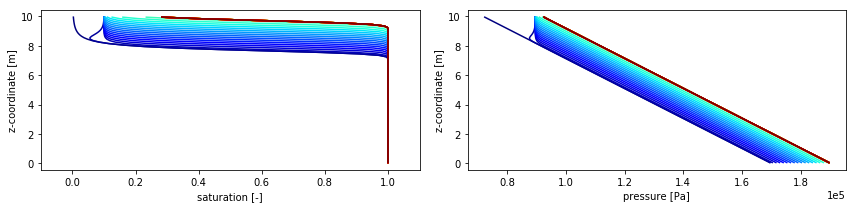

In [8]:
# plot the solution
z = dat[0,0,:]
cm = colors.cm_mapper(0,dat.shape[1]-1) # color the plots as a function of time
fig, axs = column_data.getFigs(False, False)

for i in range(dat.shape[1]):
    axs[1].plot(dat[1,i,:],z, color=cm(i))
    axs[0].plot(dat[2,i,:],z, color=cm(i))

axs[0].set_xlim([-.1,1.1])
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z-coordinate [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z-coordinate [m]')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.show()